In [2]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

Date: 2024-07-18
Merlin data for 2024-07-18: 4938 records
Baseline data for 2024-07-18: 6321 records
Merlin Condition: Engine On, Insulation: No
Baseline Condition: Engine On, Insulation: No
Conditions matched, plotting the data.
Cargo temperature statistics for 2024-07-18:
  Merlin - Min: 82.00 °F, Max: 130.80 °F, Avg: 98.63 °F
  Baseline - Min: 94.80 °F, Max: 127.60 °F, Avg: 109.28 °F
  Temp Diff:10.6 °F


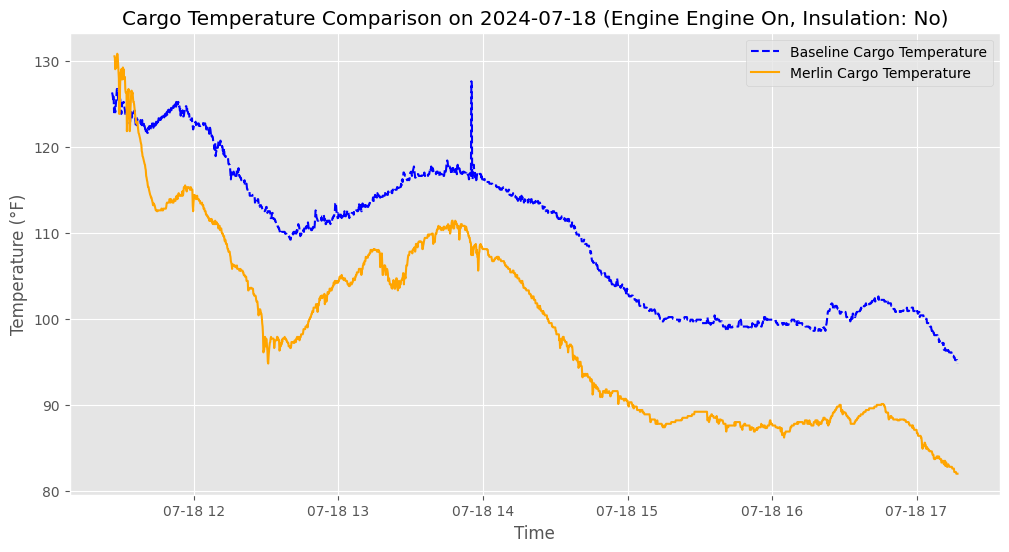

Cab temperature statistics for 2024-07-18:
  Merlin - Min: 70.50 °F, Max: 119.30 °F, Avg: 82.46 °F
  Baseline - Min: 74.30 °F, Max: 119.10 °F, Avg: 88.13 °F
  Temp Diff:5.7 °F


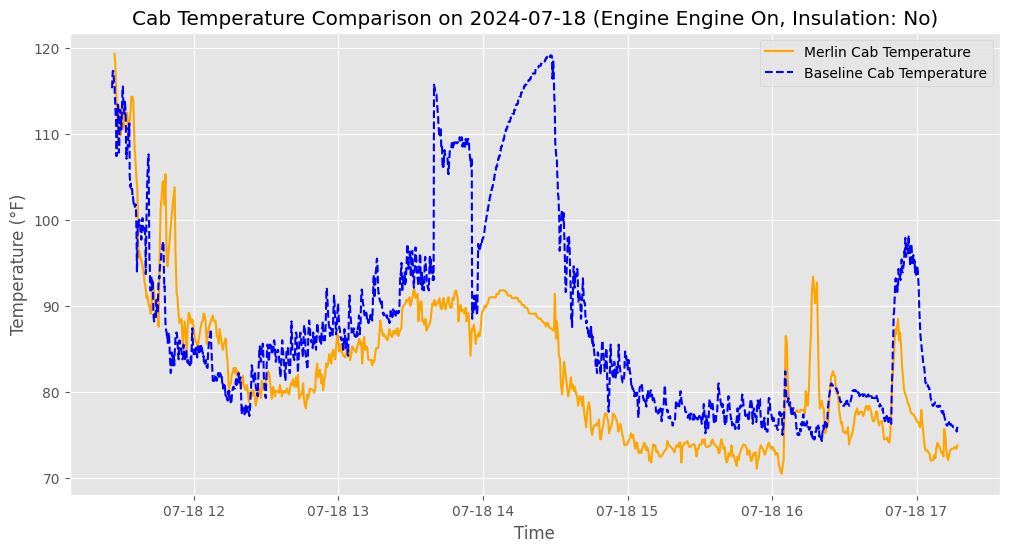

Date: 2024-07-19
Merlin data for 2024-07-19: 5794 records
Baseline data for 2024-07-19: 5922 records
Merlin Condition: Engine Off, Insulation: No
Baseline Condition: Engine Off, Insulation: No
Conditions matched, plotting the data.
Cargo temperature statistics for 2024-07-19:
  Merlin - Min: 81.90 °F, Max: 123.30 °F, Avg: 104.13 °F
  Baseline - Min: 88.70 °F, Max: 128.70 °F, Avg: 113.67 °F
  Temp Diff:9.5 °F


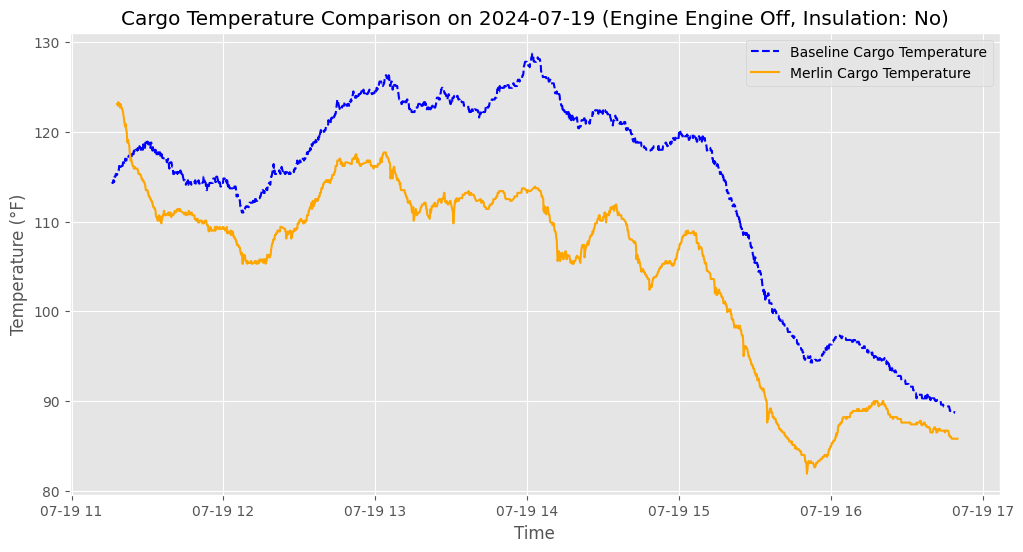

Cab temperature statistics for 2024-07-19:
  Merlin - Min: 74.70 °F, Max: 109.00 °F, Avg: 90.53 °F
  Baseline - Min: 72.70 °F, Max: 140.00 °F, Avg: 103.65 °F
  Temp Diff:13.1 °F


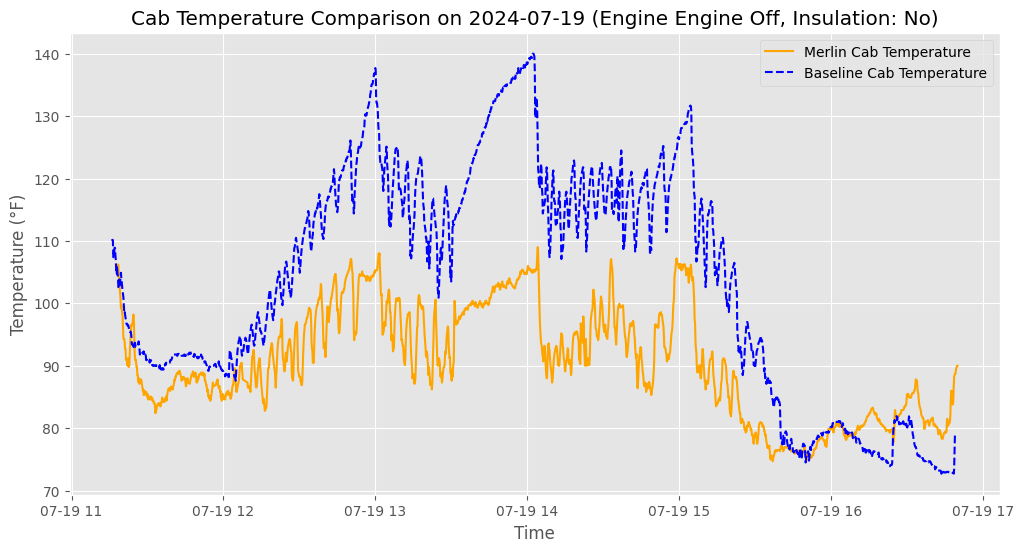

Date: 2024-07-23
Merlin data for 2024-07-23: 7903 records
Baseline data for 2024-07-23: 8233 records
Merlin Condition: Engine On, Insulation: No
Baseline Condition: Engine On, Insulation: No
Conditions matched, plotting the data.
Cargo temperature statistics for 2024-07-23:
  Merlin - Min: 76.30 °F, Max: 117.10 °F, Avg: 97.55 °F
  Baseline - Min: 86.90 °F, Max: 122.50 °F, Avg: 107.39 °F
  Temp Diff:9.8 °F


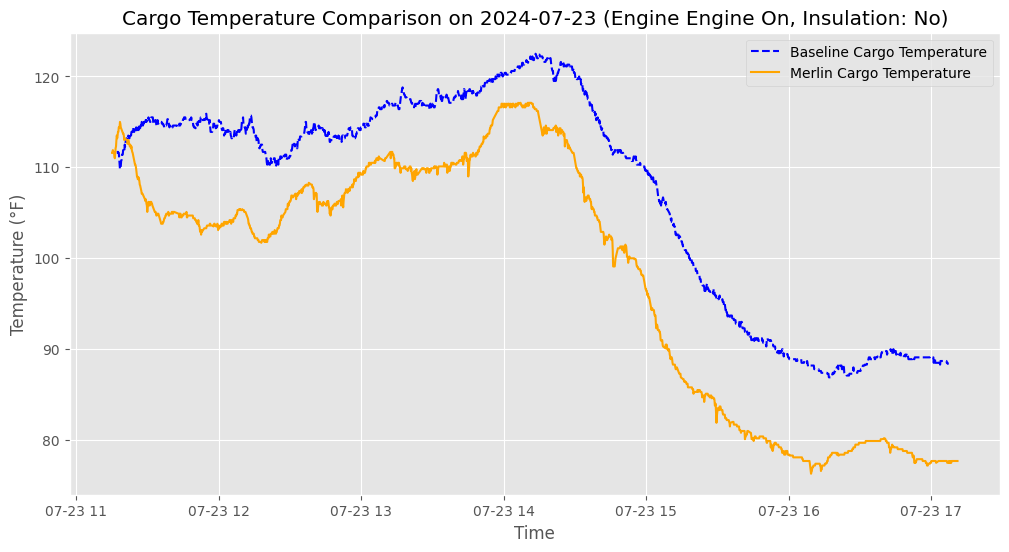

Cab temperature statistics for 2024-07-23:
  Merlin - Min: 74.10 °F, Max: 110.10 °F, Avg: 83.98 °F
  Baseline - Min: 75.20 °F, Max: 112.30 °F, Avg: 90.25 °F
  Temp Diff:6.3 °F


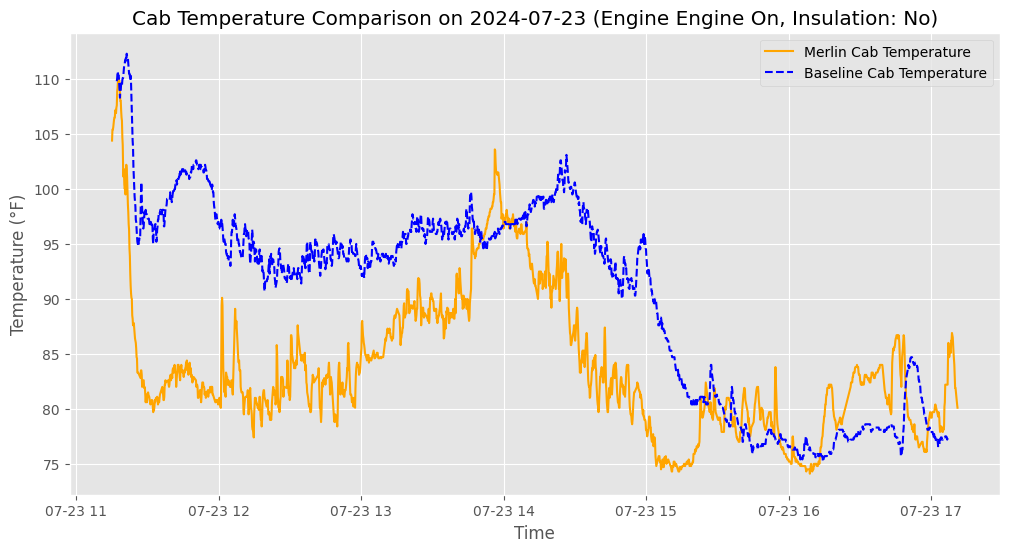

Date: 2024-07-24
Merlin data for 2024-07-24: 7922 records
Baseline data for 2024-07-24: 8202 records
Merlin Condition: Engine Off, Insulation: No
Baseline Condition: Engine Off, Insulation: No
Conditions matched, plotting the data.
Cargo temperature statistics for 2024-07-24:
  Merlin - Min: 80.20 °F, Max: 123.30 °F, Avg: 111.31 °F
  Baseline - Min: 95.70 °F, Max: 127.40 °F, Avg: 119.44 °F
  Temp Diff:8.1 °F


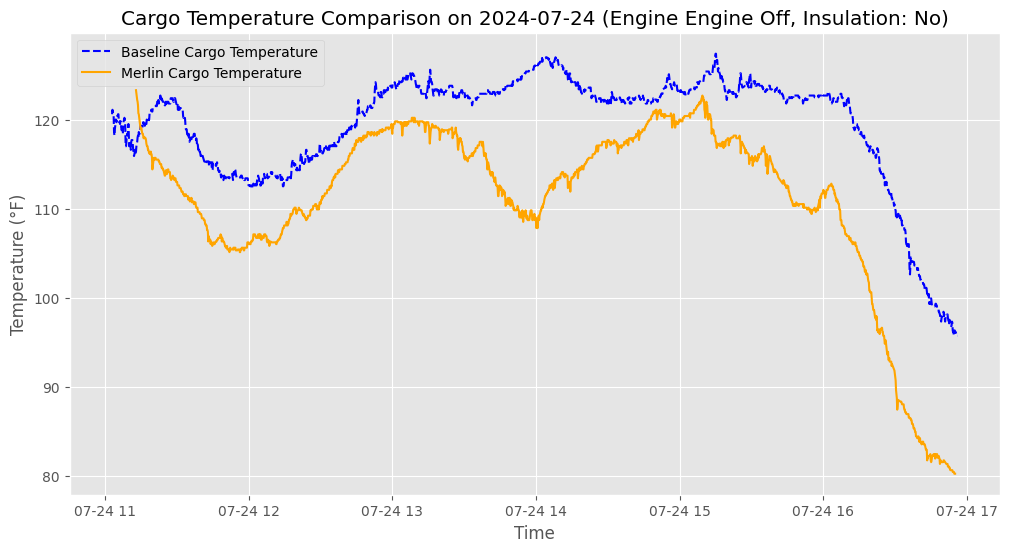

Cab temperature statistics for 2024-07-24:
  Merlin - Min: 74.50 °F, Max: 114.80 °F, Avg: 97.18 °F
  Baseline - Min: 70.00 °F, Max: 137.70 °F, Avg: 109.28 °F
  Temp Diff:12.1 °F


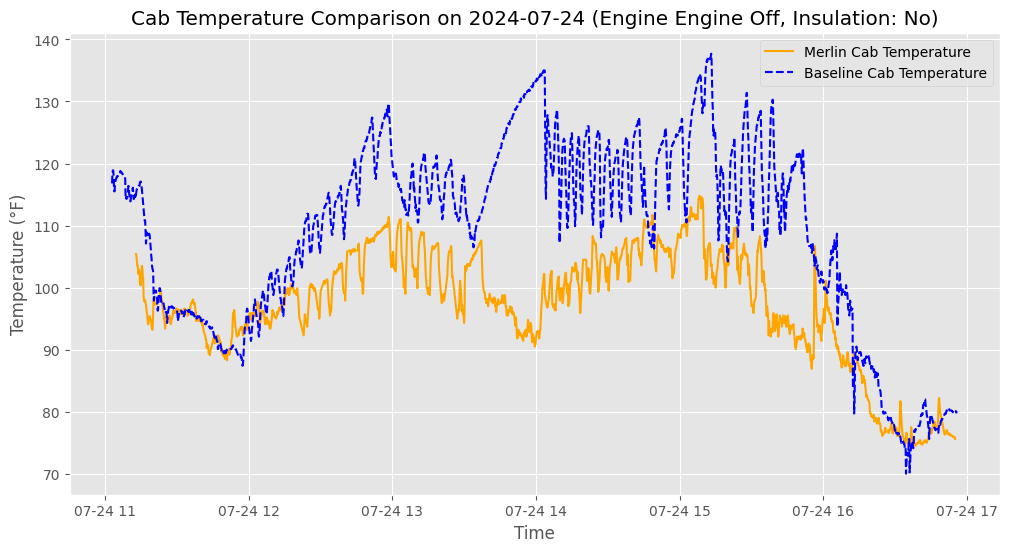

Date: 2024-08-01
Merlin data for 2024-08-01: 7533 records
Baseline data for 2024-08-01: 7440 records
Merlin Condition: Engine On, Insulation: Full
Baseline Condition: Engine On, Insulation: No
Conditions matched, plotting the data.
Cargo temperature statistics for 2024-08-01:
  Merlin - Min: 86.90 °F, Max: 121.30 °F, Avg: 98.55 °F
  Baseline - Min: 109.60 °F, Max: 129.00 °F, Avg: 117.69 °F
  Temp Diff:19.1 °F


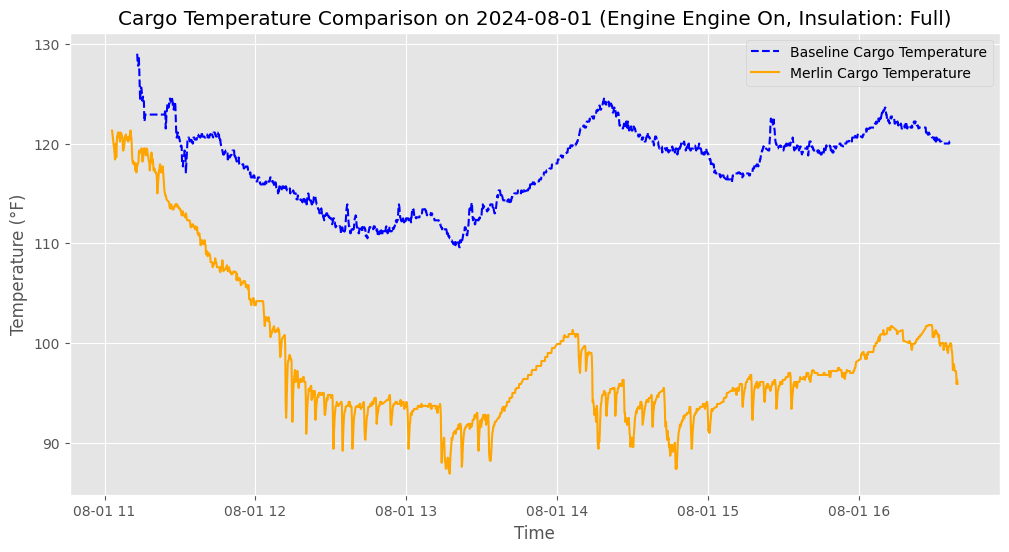

Cab temperature statistics for 2024-08-01:
  Merlin - Min: 85.60 °F, Max: 117.00 °F, Avg: 95.19 °F
  Baseline - Min: 87.30 °F, Max: 129.60 °F, Avg: 103.36 °F
  Temp Diff:8.2 °F


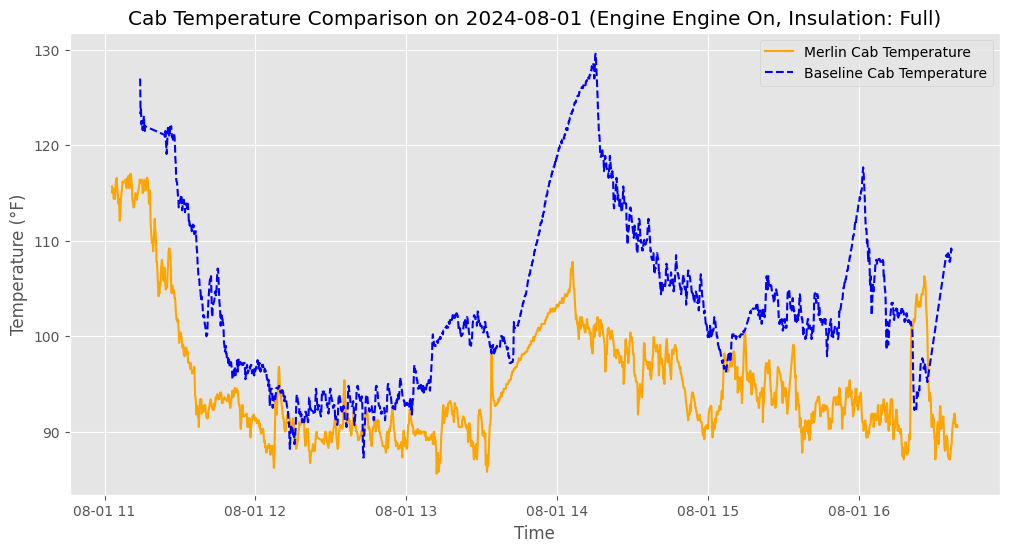

Date: 2024-07-09
Merlin data for 2024-07-09: 7513 records
Baseline data for 2024-07-09: 7807 records
Merlin Condition: Normal, Insulation: Roof
Baseline Condition: Normal, Insulation: Roof
Conditions matched, plotting the data.
Cargo temperature statistics for 2024-07-09:
  Merlin - Min: 79.20 °F, Max: 133.70 °F, Avg: 93.51 °F
  Baseline - Min: 105.60 °F, Max: 138.90 °F, Avg: 121.60 °F
  Temp Diff:28.1 °F


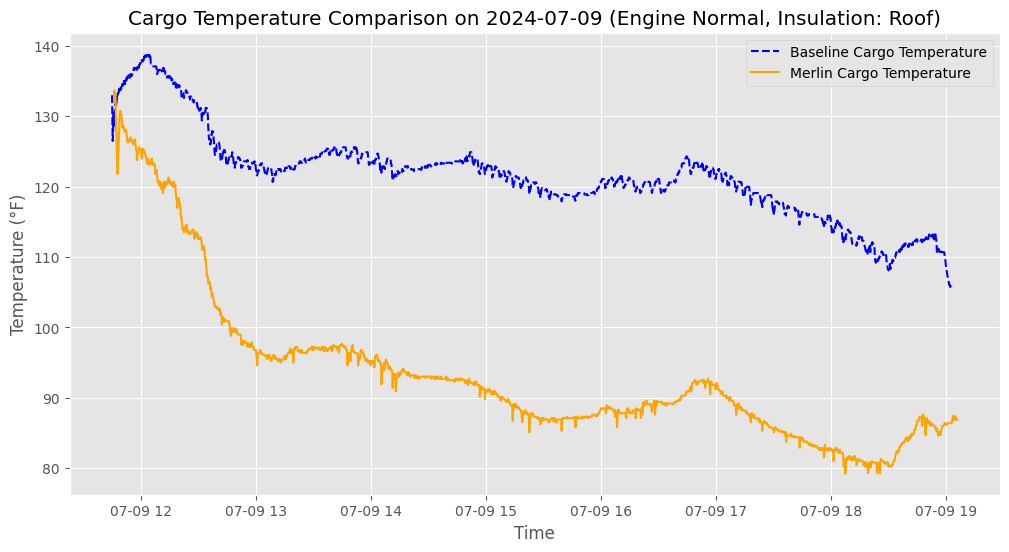

Cab temperature statistics for 2024-07-09:
  Merlin - Min: 82.60 °F, Max: 143.20 °F, Avg: 104.88 °F
  Baseline - Min: 94.60 °F, Max: 150.40 °F, Avg: 122.45 °F
  Temp Diff:17.6 °F


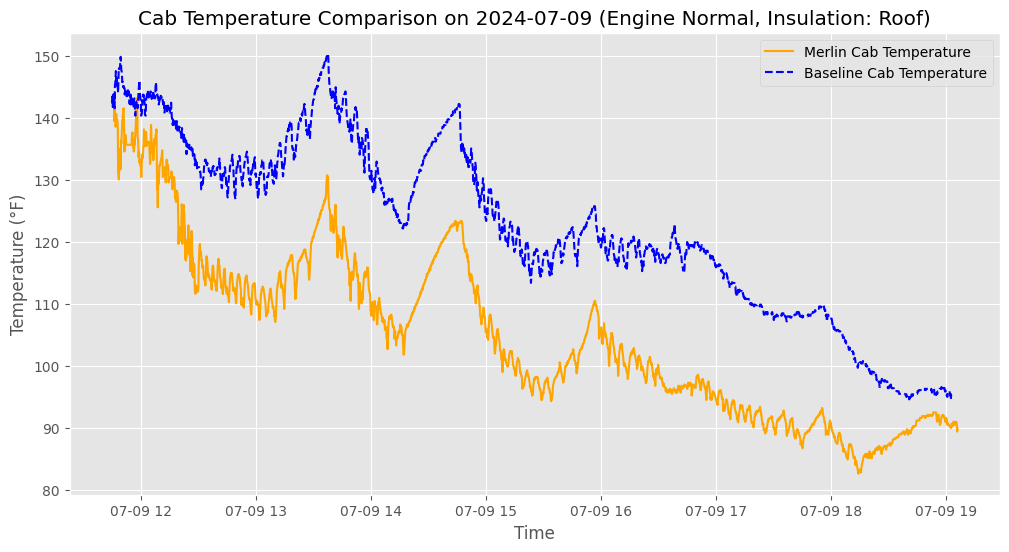

Date: 2024-07-10
Merlin data for 2024-07-10: 6414 records
Baseline data for 2024-07-10: 6380 records
Merlin Condition: Normal, Insulation: Roof
Baseline Condition: Normal, Insulation: Roof
Conditions matched, plotting the data.
Cargo temperature statistics for 2024-07-10:
  Merlin - Min: 83.70 °F, Max: 115.90 °F, Avg: 94.83 °F
  Baseline - Min: 110.50 °F, Max: 126.00 °F, Avg: 119.29 °F
  Temp Diff:24.5 °F


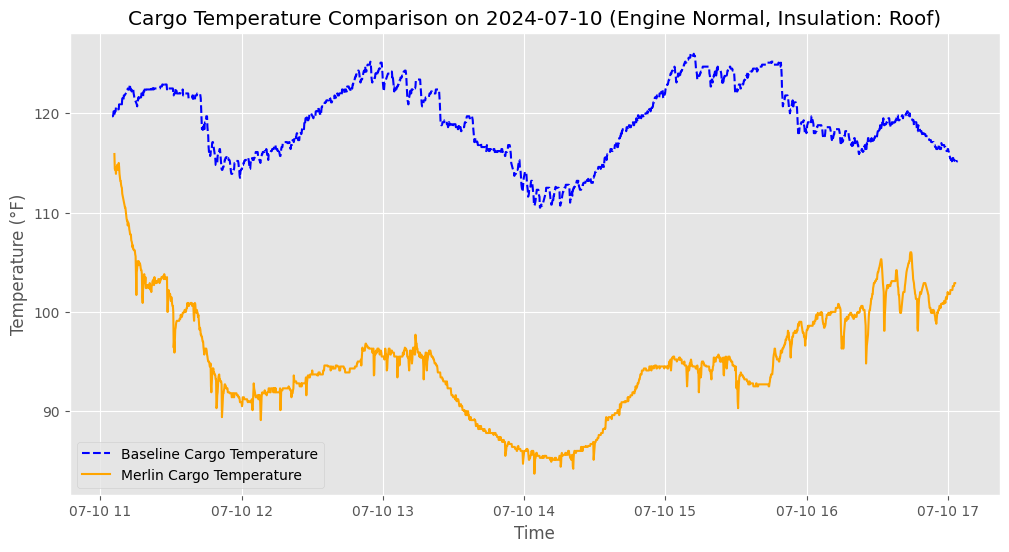

Cab temperature statistics for 2024-07-10:
  Merlin - Min: 94.60 °F, Max: 120.60 °F, Avg: 105.66 °F
  Baseline - Min: 96.30 °F, Max: 141.40 °F, Avg: 115.43 °F
  Temp Diff:9.8 °F


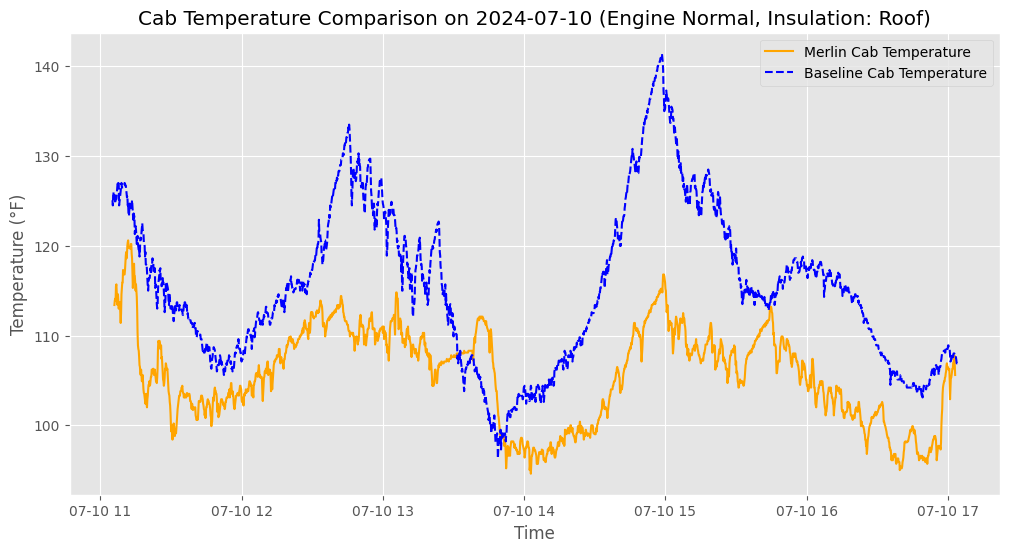

Date: 2024-07-16
Merlin data for 2024-07-16: 5583 records
Baseline data for 2024-07-16: 5797 records
Merlin Condition: Normal, Insulation: Roof
Baseline Condition: Normal, Insulation: Roof
Conditions matched, plotting the data.
Cargo temperature statistics for 2024-07-16:
  Merlin - Min: 87.10 °F, Max: 121.50 °F, Avg: 105.31 °F
  Baseline - Min: 110.80 °F, Max: 133.00 °F, Avg: 125.59 °F
  Temp Diff:20.3 °F


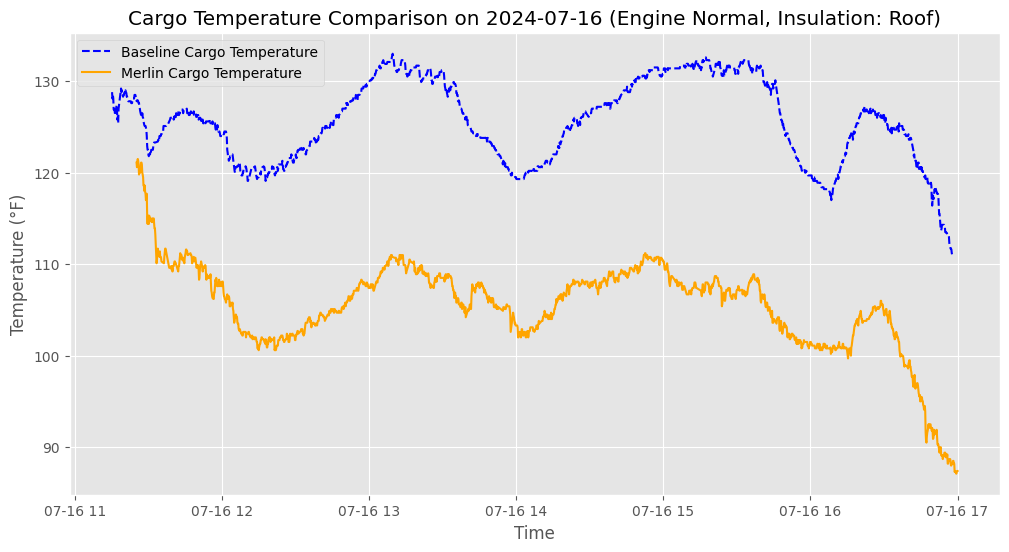

Cab temperature statistics for 2024-07-16:
  Merlin - Min: 85.10 °F, Max: 124.20 °F, Avg: 107.09 °F
  Baseline - Min: 86.40 °F, Max: 149.20 °F, Avg: 118.42 °F
  Temp Diff:11.3 °F


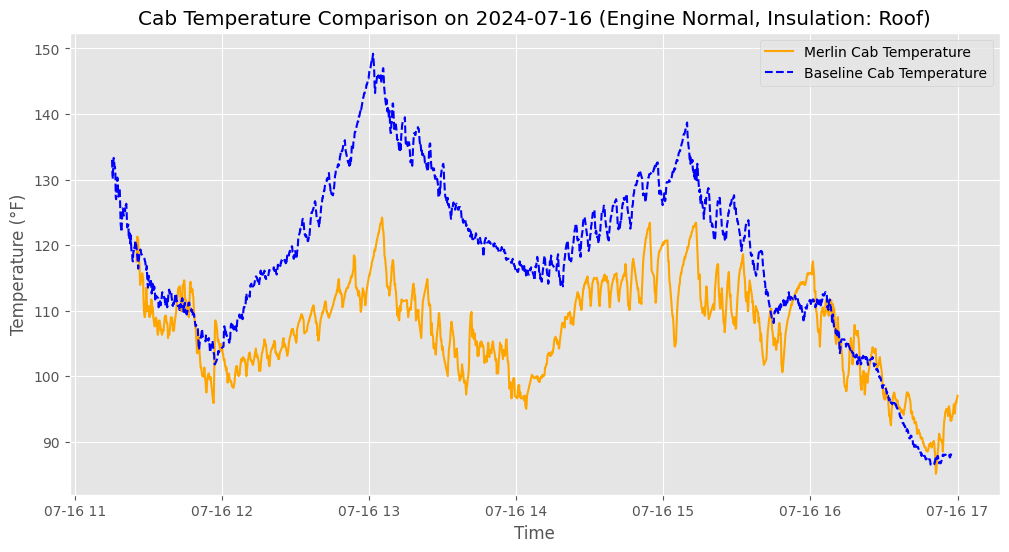

Date: 2024-07-17
Merlin data for 2024-07-17: 5232 records
Baseline data for 2024-07-17: 5311 records
Merlin Condition: Normal, Insulation: Roof
Baseline Condition: Normal, Insulation: Roof
Conditions matched, plotting the data.
Cargo temperature statistics for 2024-07-17:
  Merlin - Min: 96.60 °F, Max: 134.20 °F, Avg: 104.96 °F
  Baseline - Min: 115.70 °F, Max: 131.50 °F, Avg: 123.82 °F
  Temp Diff:18.9 °F


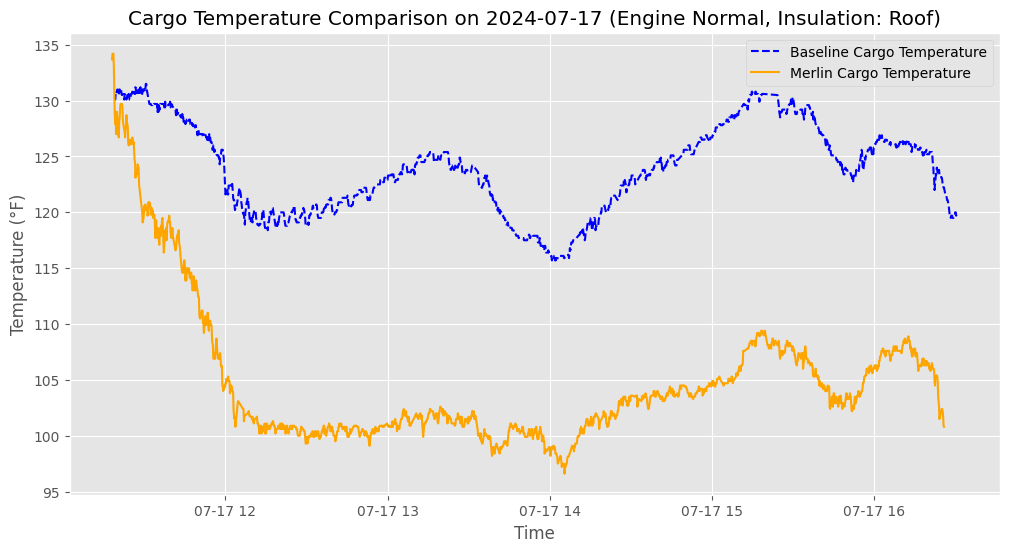

Cab temperature statistics for 2024-07-17:
  Merlin - Min: 91.00 °F, Max: 132.10 °F, Avg: 104.63 °F
  Baseline - Min: 106.00 °F, Max: 147.60 °F, Avg: 120.38 °F
  Temp Diff:15.7 °F


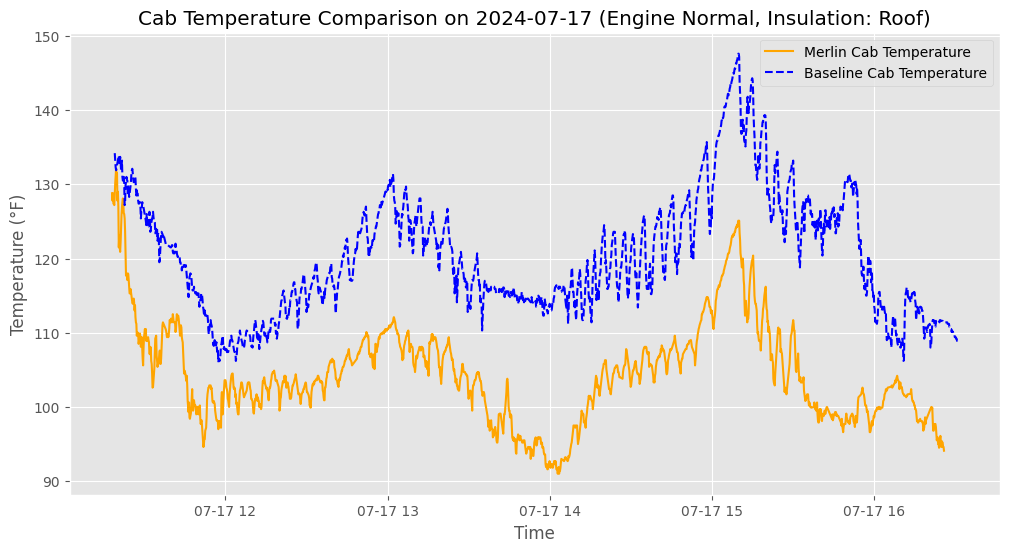

Date: 2024-07-29
Merlin data for 2024-07-29: 5749 records
Baseline data for 2024-07-29: 5884 records
Merlin Condition: Normal, Insulation: Full
Baseline Condition: Normal, Insulation: Roof
Conditions matched, plotting the data.
Cargo temperature statistics for 2024-07-29:
  Merlin - Min: 87.60 °F, Max: 124.90 °F, Avg: 103.57 °F
  Baseline - Min: 108.90 °F, Max: 139.10 °F, Avg: 130.65 °F
  Temp Diff:27.1 °F


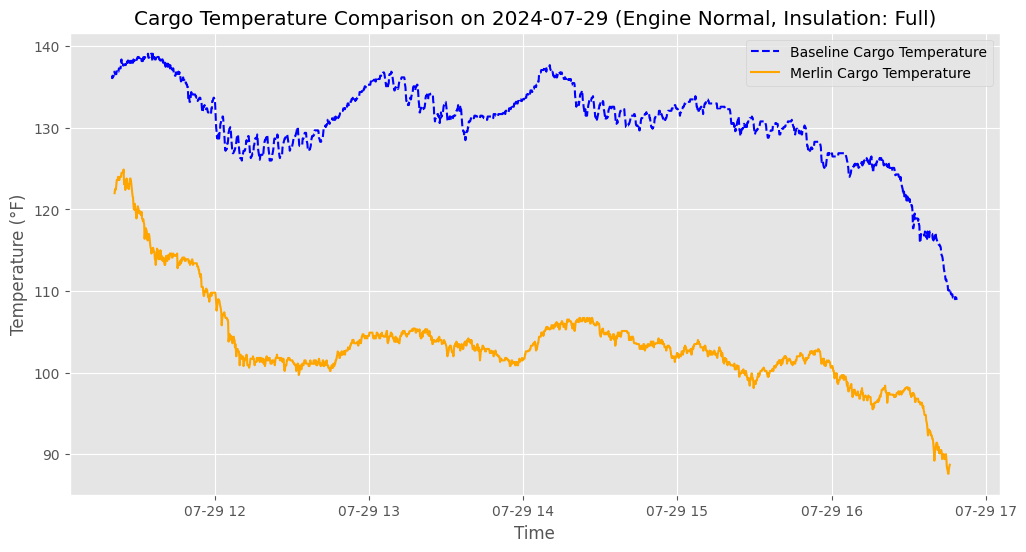

Cab temperature statistics for 2024-07-29:
  Merlin - Min: 86.50 °F, Max: 125.80 °F, Avg: 105.91 °F
  Baseline - Min: 82.40 °F, Max: 139.60 °F, Avg: 115.84 °F
  Temp Diff:9.9 °F


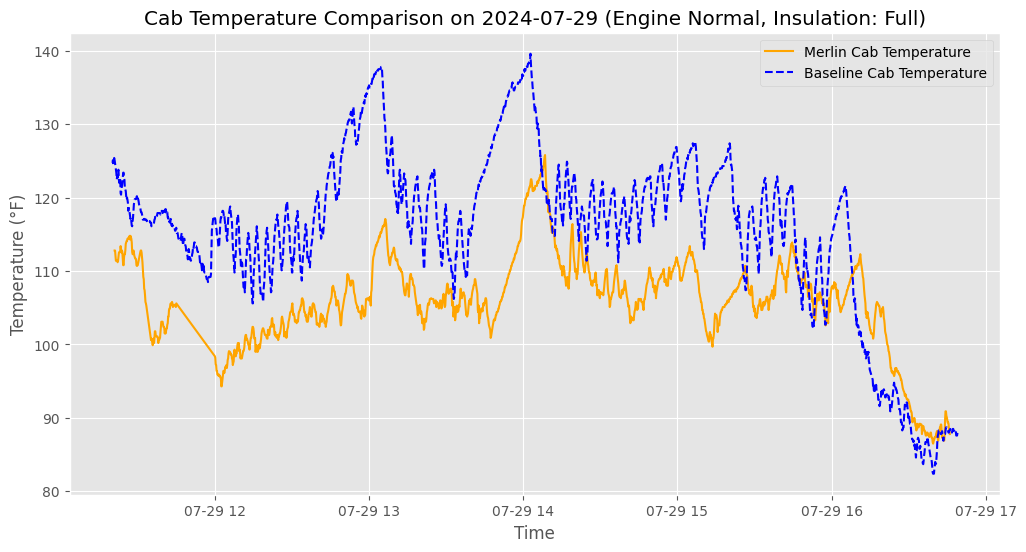

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'Merlin_DataExport_8_1.xlsx'  # Update with your file path
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Convert the date column to datetime
data['FORMATTED DATE_TIME'] = pd.to_datetime(data['FORMATTED DATE_TIME'])

# Filter the data for Merlin and Base/Baseline technologies
merlin_data = data[data['Technology'].str.contains('Merlin', case=False)]
baseline_data = data[data['Technology'].str.contains('Base', case=False)]

# Define the dates and conditions with exact match to dataset values
cdv_dates = {
    '2024-07-18': ('Engine On', 'No'),
    '2024-07-19': ('Engine Off', 'No'),
    '2024-07-23': ('Engine On', 'No'),
    '2024-07-24': ('Engine Off', 'No'),
    '2024-08-01': ('Engine On', 'Full')  # Match dataset values exactly
}

edv_dates = {
    '2024-07-09': ('Normal', 'Roof'),
    '2024-07-10': ('Normal', 'Roof'),
    '2024-07-16': ('Normal', 'Roof'),
    '2024-07-17': ('Normal', 'Roof'),
    '2024-07-29': ('Normal', 'Full')  # Match dataset values exactly
}

def plot_temperature_comparison(merlin_data, baseline_data, date, engine_status, insulation):
    # Filter data for the given date
    merlin_daily_data = merlin_data[merlin_data['FORMATTED DATE_TIME'].dt.date == pd.to_datetime(date).date()]
    baseline_daily_data = baseline_data[baseline_data['FORMATTED DATE_TIME'].dt.date == pd.to_datetime(date).date()]
    
    print(f"Date: {date}")
    print(f"Merlin data for {date}: {len(merlin_daily_data)} records")
    print(f"Baseline data for {date}: {len(baseline_daily_data)} records")

    # Initialize empty DataFrames to avoid UnboundLocalError
    merlin_cargo_data, merlin_cab_data, merlin_outside_data = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
    baseline_cargo_data, baseline_cab_data, baseline_outside_data = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

    # Check conditions
    if not merlin_daily_data.empty and not baseline_daily_data.empty:
        merlin_condition = merlin_daily_data.iloc[0]['Condition']
        merlin_insulation = merlin_daily_data.iloc[0]['Insulation']
        baseline_condition = baseline_daily_data.iloc[0]['Condition']
        baseline_insulation = baseline_daily_data.iloc[0]['Insulation']
        
        print(f"Merlin Condition: {merlin_condition}, Insulation: {merlin_insulation}")
        print(f"Baseline Condition: {baseline_condition}, Insulation: {baseline_insulation}")
        
        if merlin_condition == engine_status and merlin_insulation == insulation:
            # Separate data by location
            merlin_cargo_data = merlin_daily_data[merlin_daily_data['Location'] == 'Cargo']
            merlin_cab_data = merlin_daily_data[merlin_daily_data['Location'] == 'Cab']
            merlin_outside_data = merlin_daily_data[merlin_daily_data['Location'] == 'Out']
            
            baseline_cargo_data = baseline_daily_data[baseline_daily_data['Location'] == 'Cargo']
            baseline_cab_data = baseline_daily_data[baseline_daily_data['Location'] == 'Cab']
            baseline_outside_data = baseline_daily_data[baseline_daily_data['Location'] == 'Out']
            
            print("Conditions matched, plotting the data.")
        else:
            print("Conditions do not match.")

    # Function to calculate temperature statistics
    def calculate_temp_statistics(merlin_data, baseline_data):
        stats = {
            'Merlin': {
                'min': merlin_data['Heat Index'].min(),
                'max': merlin_data['Heat Index'].max(),
                'avg': merlin_data['Heat Index'].mean()
            },
            'Baseline': {
                'min': baseline_data['Heat Index'].min(),
                'max': baseline_data['Heat Index'].max(),
                'avg': baseline_data['Heat Index'].mean()
            }
        }
        return stats

    # Plot the data if the conditions match
    if not merlin_cargo_data.empty and not baseline_cargo_data.empty:
        cargo_stats = calculate_temp_statistics(merlin_cargo_data, baseline_cargo_data)
        print(f"Cargo temperature statistics for {date}:")
        print(f"  Merlin - Min: {cargo_stats['Merlin']['min']:.2f} °F, Max: {cargo_stats['Merlin']['max']:.2f} °F, Avg: {cargo_stats['Merlin']['avg']:.2f} °F")
        print(f"  Baseline - Min: {cargo_stats['Baseline']['min']:.2f} °F, Max: {cargo_stats['Baseline']['max']:.2f} °F, Avg: {cargo_stats['Baseline']['avg']:.2f} °F")
        print(f"  Temp Diff:{cargo_stats['Baseline']['avg']-cargo_stats['Merlin']['avg']:.1f} °F")
        plt.figure(figsize=(12, 6))
        plt.plot(baseline_cargo_data['FORMATTED DATE_TIME'], baseline_cargo_data['Heat Index'], label='Baseline Cargo Temperature', linestyle='--',color='b')
        plt.plot(merlin_cargo_data['FORMATTED DATE_TIME'], merlin_cargo_data['Heat Index'], label='Merlin Cargo Temperature', linestyle='-',color='orange')
        
        plt.title(f'Cargo Temperature Comparison on {date} (Engine {engine_status}, Insulation: {insulation})')
        plt.xlabel('Time')
        plt.ylabel('Temperature (°F)')
        plt.legend()
        plt.grid(True)
        # plt.savefig(f'august_1/Cargo_temperature_plot_{date}.png')
        plt.show()
    
    if not merlin_cab_data.empty and not baseline_cab_data.empty:
        cab_stats = calculate_temp_statistics(merlin_cab_data, baseline_cab_data)
        print(f"Cab temperature statistics for {date}:")
        print(f"  Merlin - Min: {cab_stats['Merlin']['min']:.2f} °F, Max: {cab_stats['Merlin']['max']:.2f} °F, Avg: {cab_stats['Merlin']['avg']:.2f} °F")
        print(f"  Baseline - Min: {cab_stats['Baseline']['min']:.2f} °F, Max: {cab_stats['Baseline']['max']:.2f} °F, Avg: {cab_stats['Baseline']['avg']:.2f} °F")
        print(f"  Temp Diff:{cab_stats['Baseline']['avg']-cab_stats['Merlin']['avg']:.1f} °F")
        
        plt.figure(figsize=(12, 6))
        plt.plot(merlin_cab_data['FORMATTED DATE_TIME'], merlin_cab_data['Heat Index'], label='Merlin Cab Temperature', linestyle='-',color='orange')
        plt.plot(baseline_cab_data['FORMATTED DATE_TIME'], baseline_cab_data['Heat Index'], label='Baseline Cab Temperature', linestyle='--',color='b')
        
        plt.title(f'Cab Temperature Comparison on {date} (Engine {engine_status}, Insulation: {insulation})')
        plt.xlabel('Time')
        plt.ylabel('Temperature (°F)')
        plt.legend()
        plt.grid(True)
        # plt.savefig(f'august_1/Cab_temperature_plot_{date}.png')
        plt.show()
    
    # if not merlin_outside_data.empty and not baseline_outside_data.empty:
    #     outside_stats = calculate_temp_statistics(merlin_outside_data, baseline_outside_data)
    #     print(f"Outside temperature statistics for {date}:")
    #     print(f"  Merlin - Min: {outside_stats['Merlin']['min']:.2f} °F, Max: {outside_stats['Merlin']['max']:.2f} °F, Avg: {outside_stats['Merlin']['avg']:.2f} °F")
    #     print(f"  Baseline - Min: {outside_stats['Baseline']['min']:.2f} °F, Max: {outside_stats['Baseline']['max']:.2f} °F, Avg: {outside_stats['Baseline']['avg']:.2f} °F")
        
    #     plt.figure(figsize=(12, 6))
    #     plt.plot(merlin_outside_data['FORMATTED DATE_TIME'], merlin_outside_data['Heat Index'], label='Merlin Outside Temperature', linestyle='-',color='orange')
    #     plt.plot(baseline_outside_data['FORMATTED DATE_TIME'], baseline_outside_data['Heat Index'], label='Baseline Outside Temperature', linestyle='--',color='b')
        
    #     plt.title(f'Outside Temperature Comparison on {date} (Engine {engine_status}, Insulation: {insulation})')
    #     plt.xlabel('Time')
    #     plt.ylabel('Temperature (°F)')
    #     plt.legend()
    #     plt.grid(True)
    #     # plt.savefig(f'august_1/outside_temperature_plot_{date}.png')
    #     plt.show()
    else:
        print(f"No matching data for date {date} with conditions Engine {engine_status}, Insulation: {insulation}.")

# Plot for CDV dates
for date, (engine_status, insulation) in cdv_dates.items():
    plot_temperature_comparison(merlin_data[merlin_data['Vehicle'] == 'CDV'], baseline_data[baseline_data['Vehicle'] == 'CDV'], date, engine_status, insulation)



# # Plot for EDV dates
for date, (engine_status, insulation) in edv_dates.items():
    plot_temperature_comparison(merlin_data[merlin_data['Vehicle'] == 'EDV'], baseline_data[baseline_data['Vehicle'] == 'EDV'], date, engine_status, insulation)

